# Analysing the record of eye cancer patients

In [3]:
import pandas as pd

df = pd.read_csv('eye_cancer_patients.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Patient_ID            5000 non-null   object
 1   Age                   5000 non-null   int64 
 2   Gender                5000 non-null   object
 3   Cancer_Type           5000 non-null   object
 4   Laterality            5000 non-null   object
 5   Date_of_Diagnosis     5000 non-null   object
 6   Stage_at_Diagnosis    5000 non-null   object
 7   Treatment_Type        5000 non-null   object
 8   Surgery_Status        5000 non-null   bool  
 9   Radiation_Therapy     5000 non-null   int64 
 10  Chemotherapy          5000 non-null   int64 
 11  Outcome_Status        5000 non-null   object
 12  Survival_Time_Months  5000 non-null   int64 
 13  Genetic_Markers       2503 non-null   object
 14  Family_History        5000 non-null   bool  
 15  Country               5000 non-null   

### Data cleaning

In [42]:
df_new = df
df_new['has_BRAF'] = pd.notna(df_new['Genetic_Markers'])
df_new = df_new.drop(['Patient_ID', 'Genetic_Markers'], axis = 1)
df_new.head()

,Age,Gender,Cancer_Type,Laterality,Date_of_Diagnosis,Stage_at_Diagnosis,Treatment_Type,Surgery_Status,Radiation_Therapy,Chemotherapy,Outcome_Status,Survival_Time_Months,Family_History,Country,has_BRAF
0,58,F,Retinoblastoma,Left,2019-01-25,Stage IV,Radiation,False,15,3,Deceased,85,True,UK,False
1,15,Other,Retinoblastoma,Right,2021-10-21,Stage III,Chemotherapy,True,69,6,In Remission,10,True,Japan,False
2,64,M,Retinoblastoma,Bilateral,2021-03-12,Stage IV,Surgery,False,47,6,In Remission,3,False,UK,True
3,33,M,Melanoma,Right,2021-05-10,Stage II,Radiation,True,36,6,Active,40,False,Canada,False
4,8,Other,Lymphoma,Left,2019-11-24,Stage I,Chemotherapy,False,14,14,In Remission,26,True,USA,True


## Survival time for patients with and without BRAF mutation

In [45]:
import scipy.stats as stats

group1 = df_new[df_new['has_BRAF'] == True]['Survival_Time_Months']
group2 = df_new[df_new['has_BRAF'] != True]['Survival_Time_Months']

t_stat, p_val = stats.ttest_ind(group1, group2, nan_policy='omit')

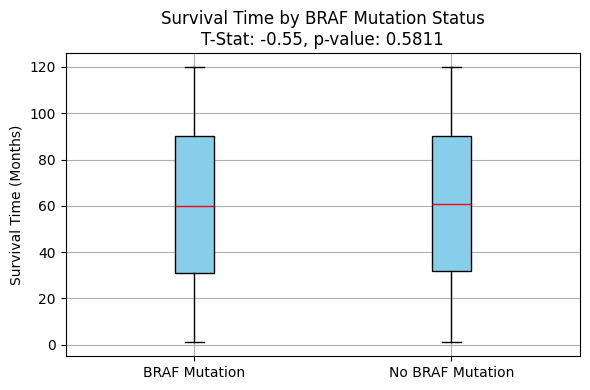

In [52]:
import matplotlib.pyplot as plt

data = [group1, group2]
labels = ['BRAF Mutation', 'No BRAF Mutation']

# box plot
plt.figure(figsize=(6, 4))
plt.boxplot(data, tick_labels=labels, patch_artist=True,
            boxprops=dict(facecolor='skyblue'),
            medianprops=dict(color='red'))

plt.title(f'Survival Time by BRAF Mutation Status\nT-Stat: {t_stat:.2f}, p-value: {p_val:.4f}')
plt.ylabel('Survival Time (Months)')
plt.grid(True)
plt.tight_layout()
plt.show()

The results show that there is no significant difference in the survival time for patients with and without the genetic mutation. 